# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [3]:
print(len(cities))

624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | dryden
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | fort mcmurray
Processing Record 9 of Set 1 | terekli-mekteb
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | nikolayevsk-on-amure
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | villa gesell
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | greenland
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | canico
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | santa ana
Processing

Processing Record 37 of Set 4 | mantua
Processing Record 38 of Set 4 | saudarkrokur
Processing Record 39 of Set 4 | lukoyanov
Processing Record 40 of Set 4 | yahotyn
Processing Record 41 of Set 4 | churachandpur
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | kataragama
City not found. Skipping...
Processing Record 44 of Set 4 | altai
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | invercargill
Processing Record 47 of Set 4 | pucallpa
Processing Record 48 of Set 4 | kepsut
Processing Record 49 of Set 4 | kiama
Processing Record 0 of Set 5 | city of isabela
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | kone
Processing Record 6 of Set 5 | puerto natales
Processing Record 7 of Set 5 | constantia
Processing Record 8 of Set 5 | nuuk
Processing Record 9 of Set 5 | ta`u
Processing Record 

Processing Record 30 of Set 8 | kamloops
Processing Record 31 of Set 8 | mathura
Processing Record 32 of Set 8 | ghanzi
Processing Record 33 of Set 8 | puerto yuca
Processing Record 34 of Set 8 | magadan
Processing Record 35 of Set 8 | bamboo flat
Processing Record 36 of Set 8 | tuskegee
Processing Record 37 of Set 8 | silvia
Processing Record 38 of Set 8 | soio
Processing Record 39 of Set 8 | sao tome
Processing Record 40 of Set 8 | castillos
Processing Record 41 of Set 8 | gadzhiyevo
Processing Record 42 of Set 8 | st. john's
Processing Record 43 of Set 8 | san andres
Processing Record 44 of Set 8 | thunder bay
Processing Record 45 of Set 8 | illizi
Processing Record 46 of Set 8 | srinagar
Processing Record 47 of Set 8 | kyshtovka
Processing Record 48 of Set 8 | porbandar
Processing Record 49 of Set 8 | fort bragg
Processing Record 0 of Set 9 | bethanie
Processing Record 1 of Set 9 | brookings
Processing Record 2 of Set 9 | baghdad
Processing Record 3 of Set 9 | lushun
Processing Rec

Processing Record 19 of Set 12 | las tablas
Processing Record 20 of Set 12 | bonthe
Processing Record 21 of Set 12 | la gi
Processing Record 22 of Set 12 | tokonou
Processing Record 23 of Set 12 | arno
Processing Record 24 of Set 12 | inari
Processing Record 25 of Set 12 | micheweni
Processing Record 26 of Set 12 | fortaleza
Processing Record 27 of Set 12 | isola di capo rizzuto
Processing Record 28 of Set 12 | qamdo
Processing Record 29 of Set 12 | sirinhaem
Processing Record 30 of Set 12 | douz
Processing Record 31 of Set 12 | summerland
Processing Record 32 of Set 12 | mohr
Processing Record 33 of Set 12 | vila franca do campo
Processing Record 34 of Set 12 | kasaragod
Processing Record 35 of Set 12 | richards bay
Processing Record 36 of Set 12 | afua
Processing Record 37 of Set 12 | fuwwah
Processing Record 38 of Set 12 | odder
Processing Record 39 of Set 12 | kisai
Processing Record 40 of Set 12 | san pablo villa de mitla
Processing Record 41 of Set 12 | tekirova
Processing Record

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,-6.07,75,100,0.00,US,1709872179
1,dryden,49.7833,-92.7503,-8.84,79,100,3.60,CA,1709872179
2,waitangi,-43.9535,-176.5597,15.46,73,23,0.89,NZ,1709872180
3,yellowknife,62.4560,-114.3525,-14.21,84,100,2.06,CA,1709872180
4,utrik,11.2278,169.8474,26.60,81,80,10.95,MH,1709872180


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,-6.07,75,100,0.00,US,1709872179
1,dryden,49.7833,-92.7503,-8.84,79,100,3.60,CA,1709872179
2,waitangi,-43.9535,-176.5597,15.46,73,23,0.89,NZ,1709872180
3,yellowknife,62.4560,-114.3525,-14.21,84,100,2.06,CA,1709872180
4,utrik,11.2278,169.8474,26.60,81,80,10.95,MH,1709872180


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

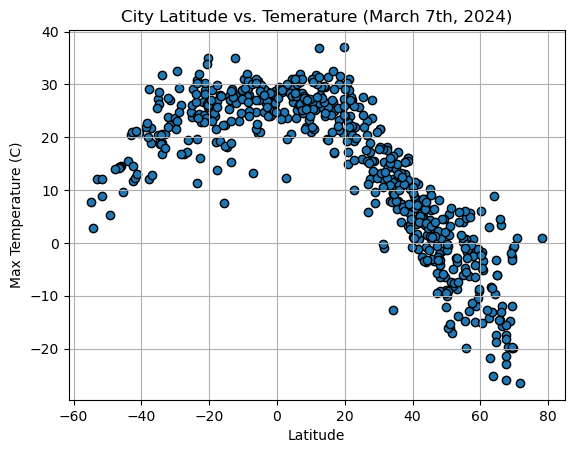

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temerature (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

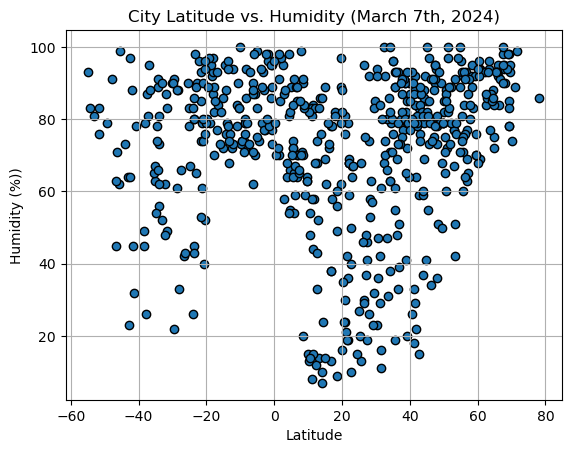

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

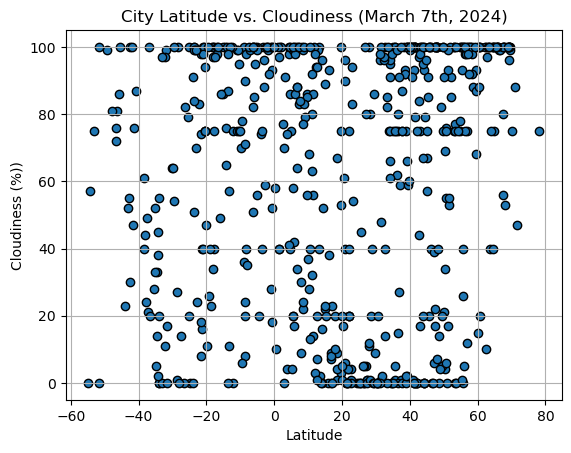

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

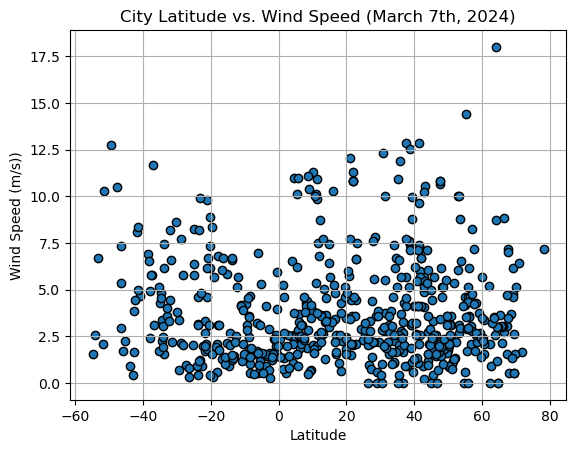

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def regression(x, y):
    
    x_range = max(x) - min(x)
    y_range = max(y) - min(y)
    x_annotation = min(x) + 0.7 * x_range
    y_annotation = min(y) + 0.8 * y_range
    
    slope, intercept, r, p, std_err = linregress(x, y)
    fit = slope * x + intercept
    fit_str = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
    plt.scatter(x, y)
    plt.plot(x, fit, color='r')
    plt.annotate(fit_str, xy = (x_annotation, y_annotation), fontsize=15, color = "red")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    print(f'The r-value is: {r}')
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[
    city_data_df["Lat"] >= 0
]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,-6.07,75,100,0.00,US,1709872179
1,dryden,49.7833,-92.7503,-8.84,79,100,3.60,CA,1709872179
3,yellowknife,62.4560,-114.3525,-14.21,84,100,2.06,CA,1709872180
4,utrik,11.2278,169.8474,26.60,81,80,10.95,MH,1709872180
7,fort mcmurray,56.7268,-111.3810,-6.23,63,75,2.06,CA,1709872180


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[
    city_data_df["Lat"] < 0
]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,15.46,73,23,0.89,NZ,1709872180
5,grytviken,-54.2811,-36.5092,2.85,83,57,2.56,GS,1709872180
6,port-aux-francais,-49.3500,70.2167,5.33,79,99,12.75,TF,1709872180
12,villa gesell,-37.2639,-56.9730,21.70,81,21,5.79,AR,1709872181
13,kavieng,-2.5744,150.7967,28.53,77,59,1.60,PG,1709872181


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9062422931472623


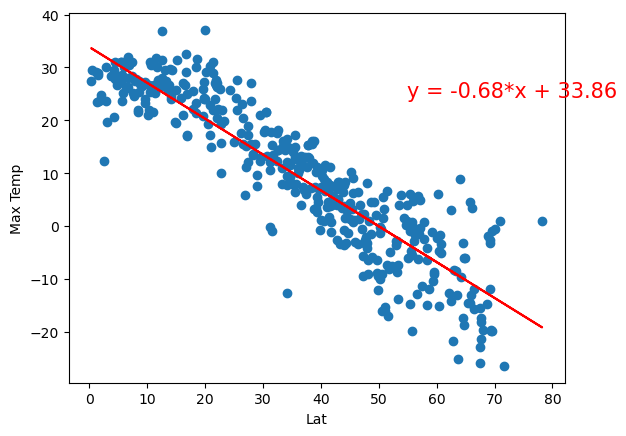

In [20]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

With an r-value of -0.9062422931472623, there is a very strong, negative, linear correlation between Latitude and Max Temperature for cities in the Northern Hemisphere, meaning that the further north you go, the lower the Max Temp.

The r-value is: 0.6064826692530946


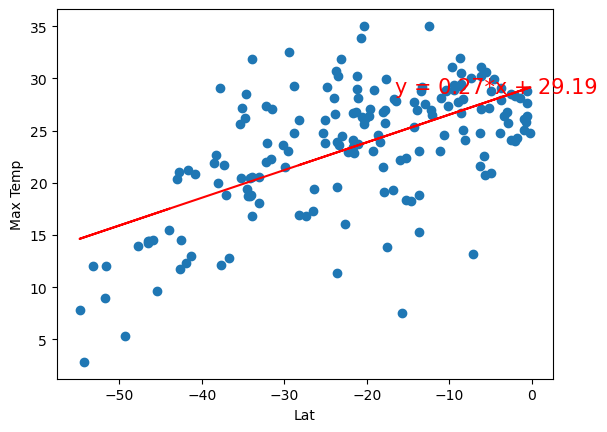

In [21]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

With an r-value of 0.6064826692530946, there is a moderate, positive, linear relationship between Latitude and Max Temp for cities in the Southern Hemisphere, meaning that the further south you go, the lower the Max Temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3585710664455842


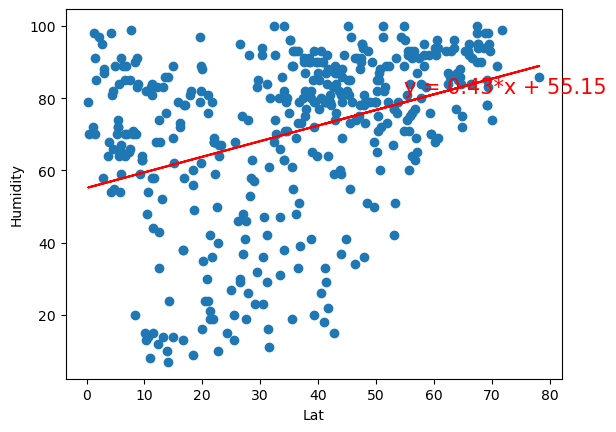

In [22]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

With an r-value of 0.3585710664455842, there is a weak/moderate, positive, linear relationship between the Latitude and Humidity % for cities in the Northern Hempisphere.

The r-value is: 0.31656150334230687


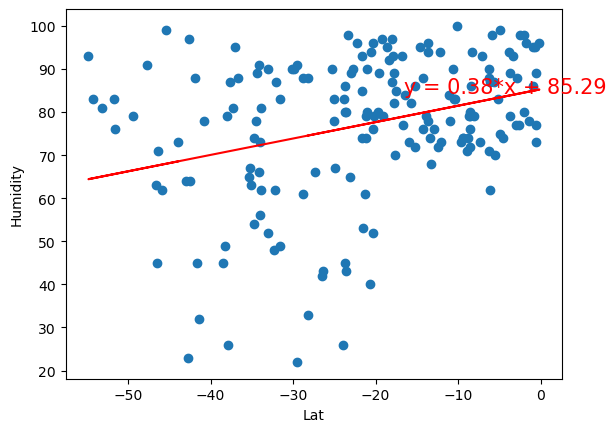

In [23]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

With an r-value of 0.31656150334230687, there is a weak/moderate, positive, linear correlation between Latitude and Humidity for cities in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2591652350673652


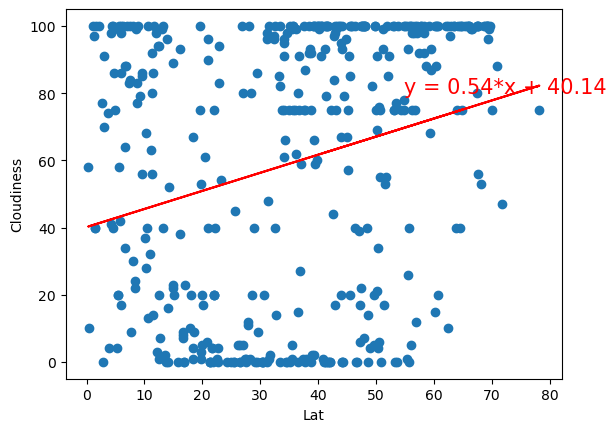

In [24]:
# Northern Hemisphere

regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

With an r-value of 0.2591652350673652, there is a weak, positive, linear correlation between Latitude and Cloudiness for cities in the Northern Hemisphere, this relationship is negligable.

The r-value is: 0.25642578011116124


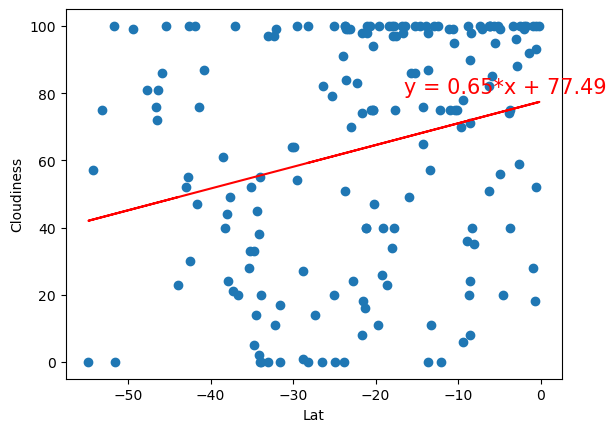

In [25]:
# Southern Hemisphere

regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

With an r-value of 0.25642578011116124, there is a weak, positive, linear relationship between Latitude and Cloudiness for cities in the Southern Hemisphere. This relationship is likely negligible.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03206440685297653


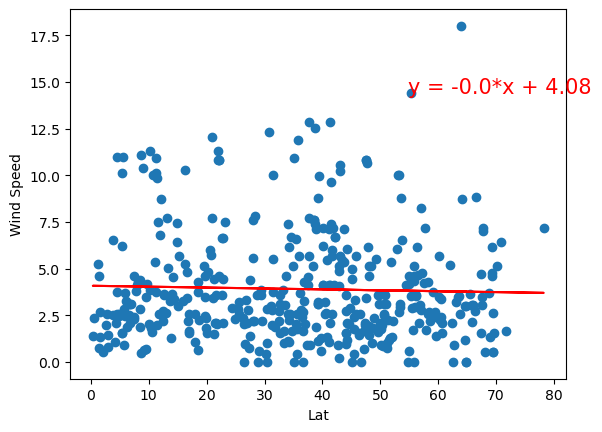

In [26]:
# Northern Hemisphere

regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

With an r-value of -0.03206440685297653, there is no correlation between Latitude and Wind Speed for cities in the Northern Hemisphere, this relationship is negligible.

The r-value is: -0.3578825564977135


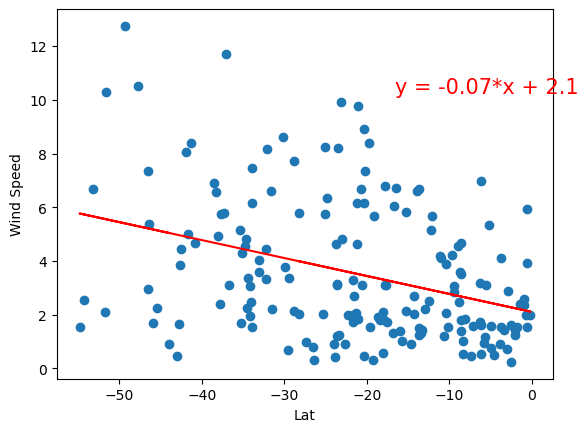

In [27]:
# Southern Hemisphere

regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

With an r-value of -0.3578825564977135, there is a weak, negative, linear correlation between Latitude and Wind Speed for cities in the Southern Hemisphere.